# **Importing the modules**

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from model.utils import plot_missing_values, plot_missing_values_bar, CustomLabelEncoder
import warnings

warnings.filterwarnings("ignore")

# **Reading the dataset**

In [2]:
df = pd.read_csv('../data/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# **Shape of DataFrame**

In [3]:
print(f'The number of rows are {df.shape[0] } and the number of columns are {df.shape[1]}')

The number of rows are 145460 and the number of columns are 23


# **Describing the attributes**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**6 columns are of type 'object' and remaining of 'float'**

# **Finding all the categorical and continuous values**

In [5]:
categorical_col, contin_val=[],[]

for i in df.columns:
    
    if df[i].dtype == 'object':
        categorical_col.append(i)
    else:
        contin_val.append(i)
        
print(categorical_col)
print(contin_val)

['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


# **Construction of histograms of numerical variables**

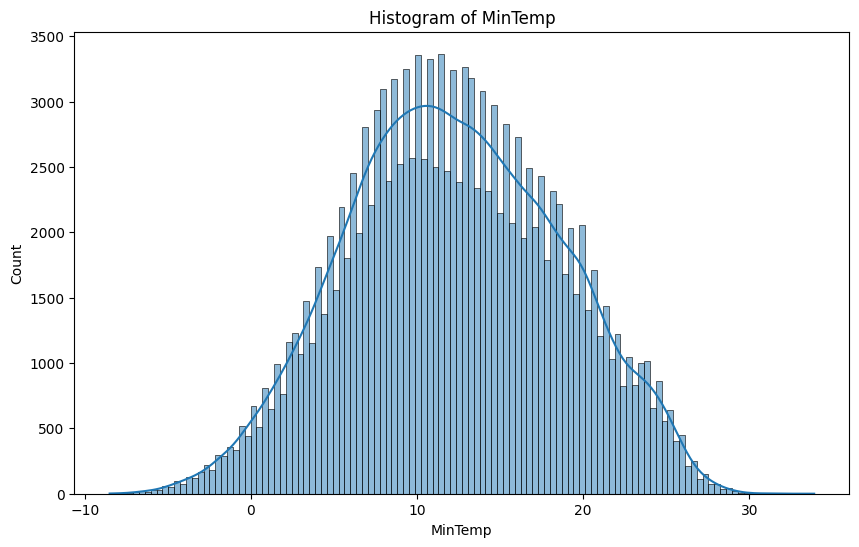

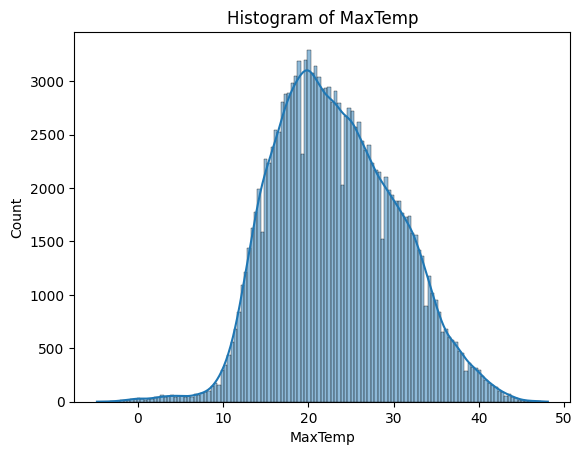

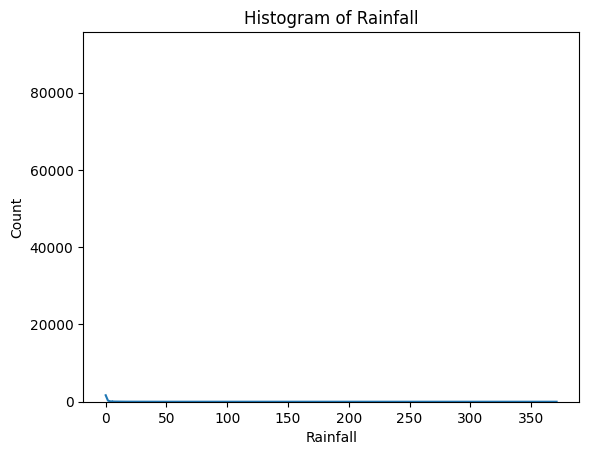

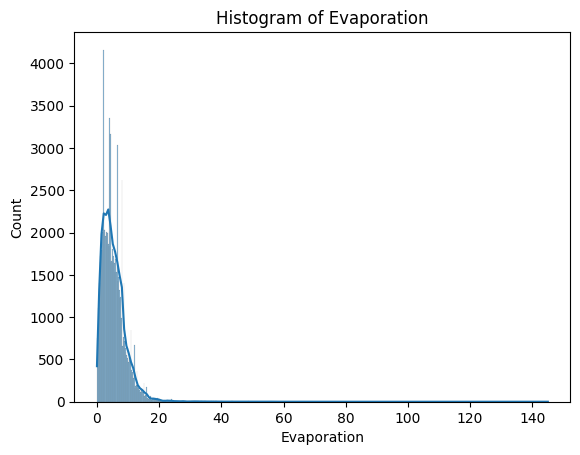

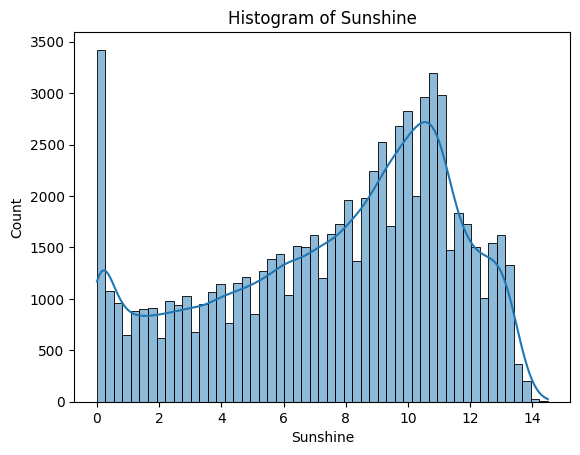

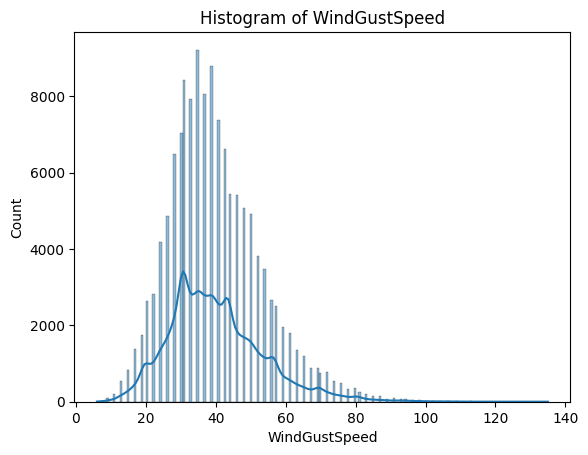

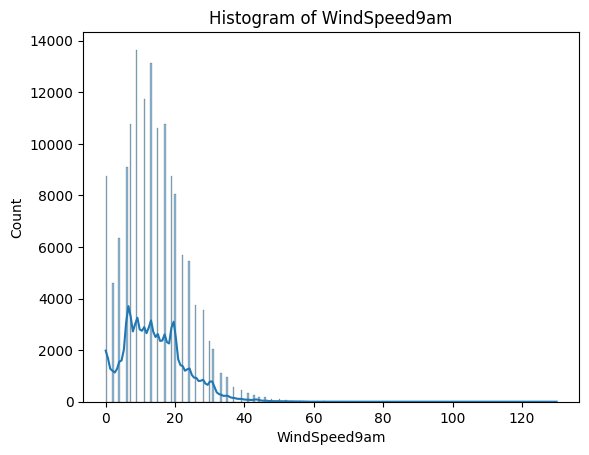

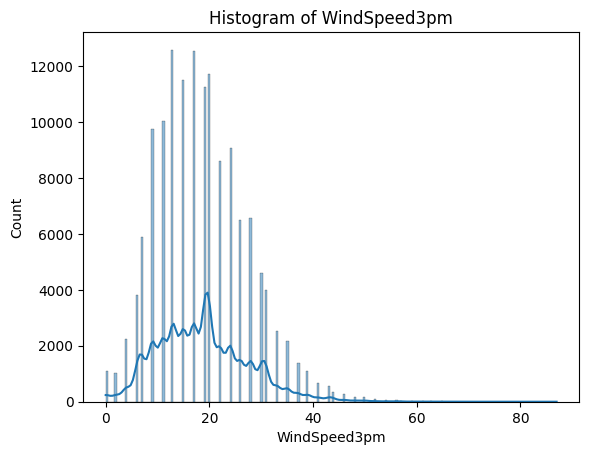

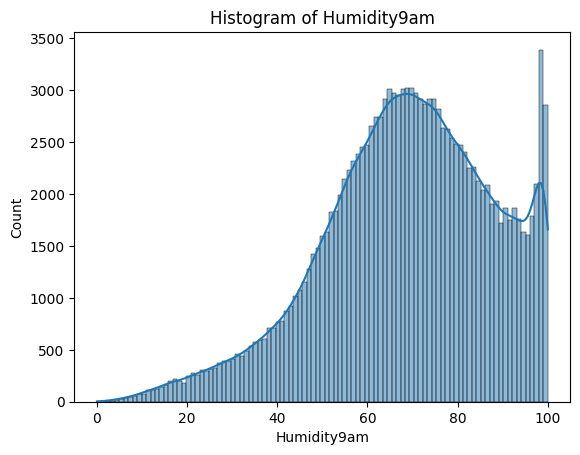

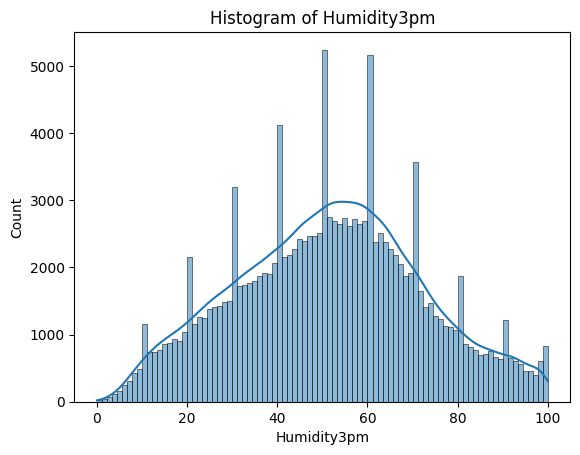

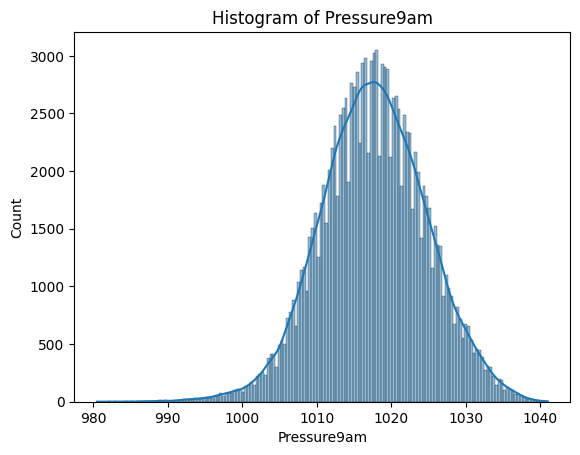

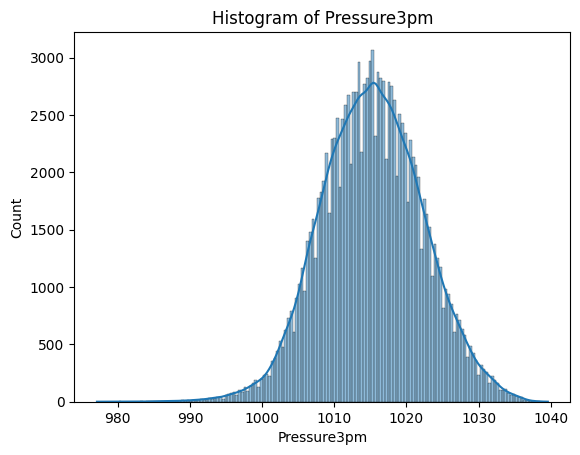

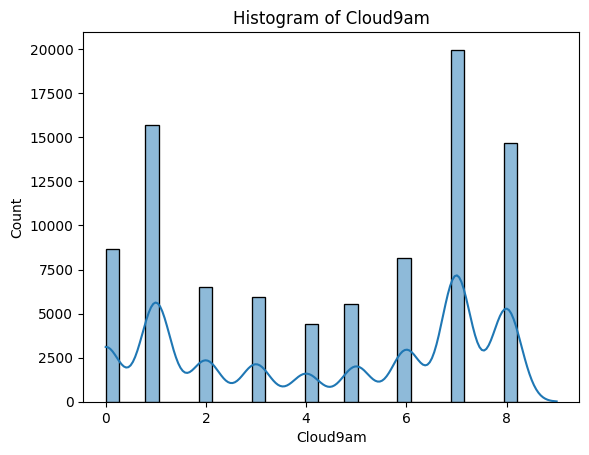

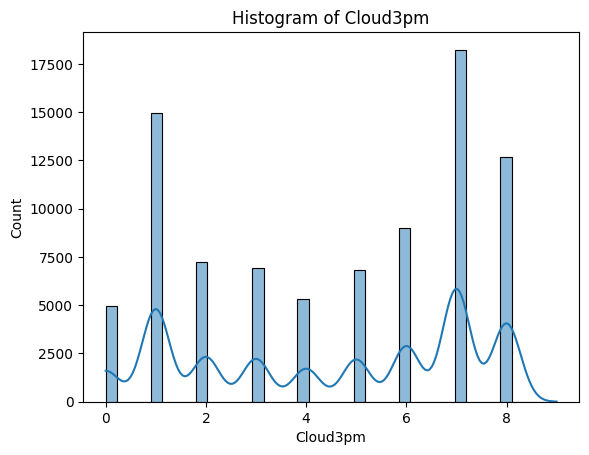

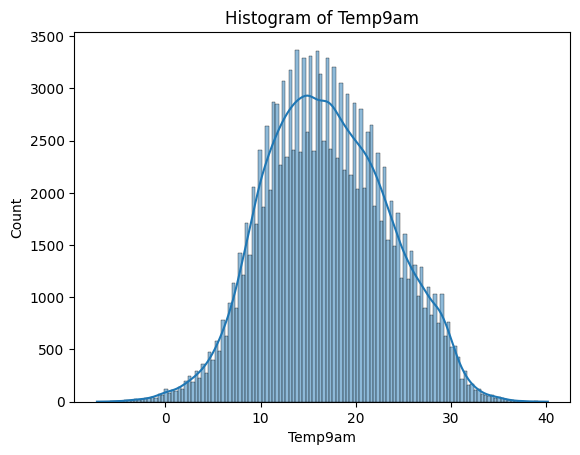

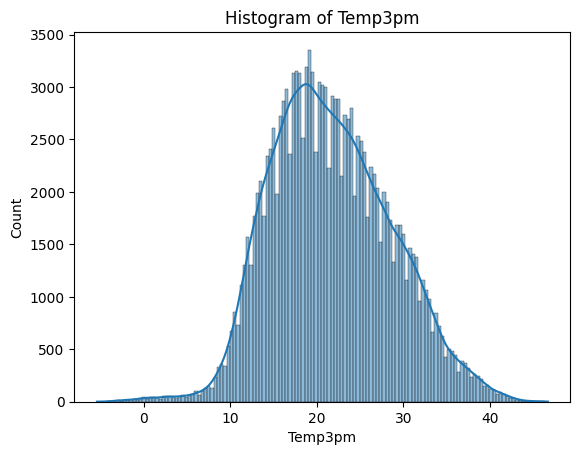

In [6]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
for column in numeric_df.columns:
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')
    plt.show()

# **Construction of histograms of categorical variables**

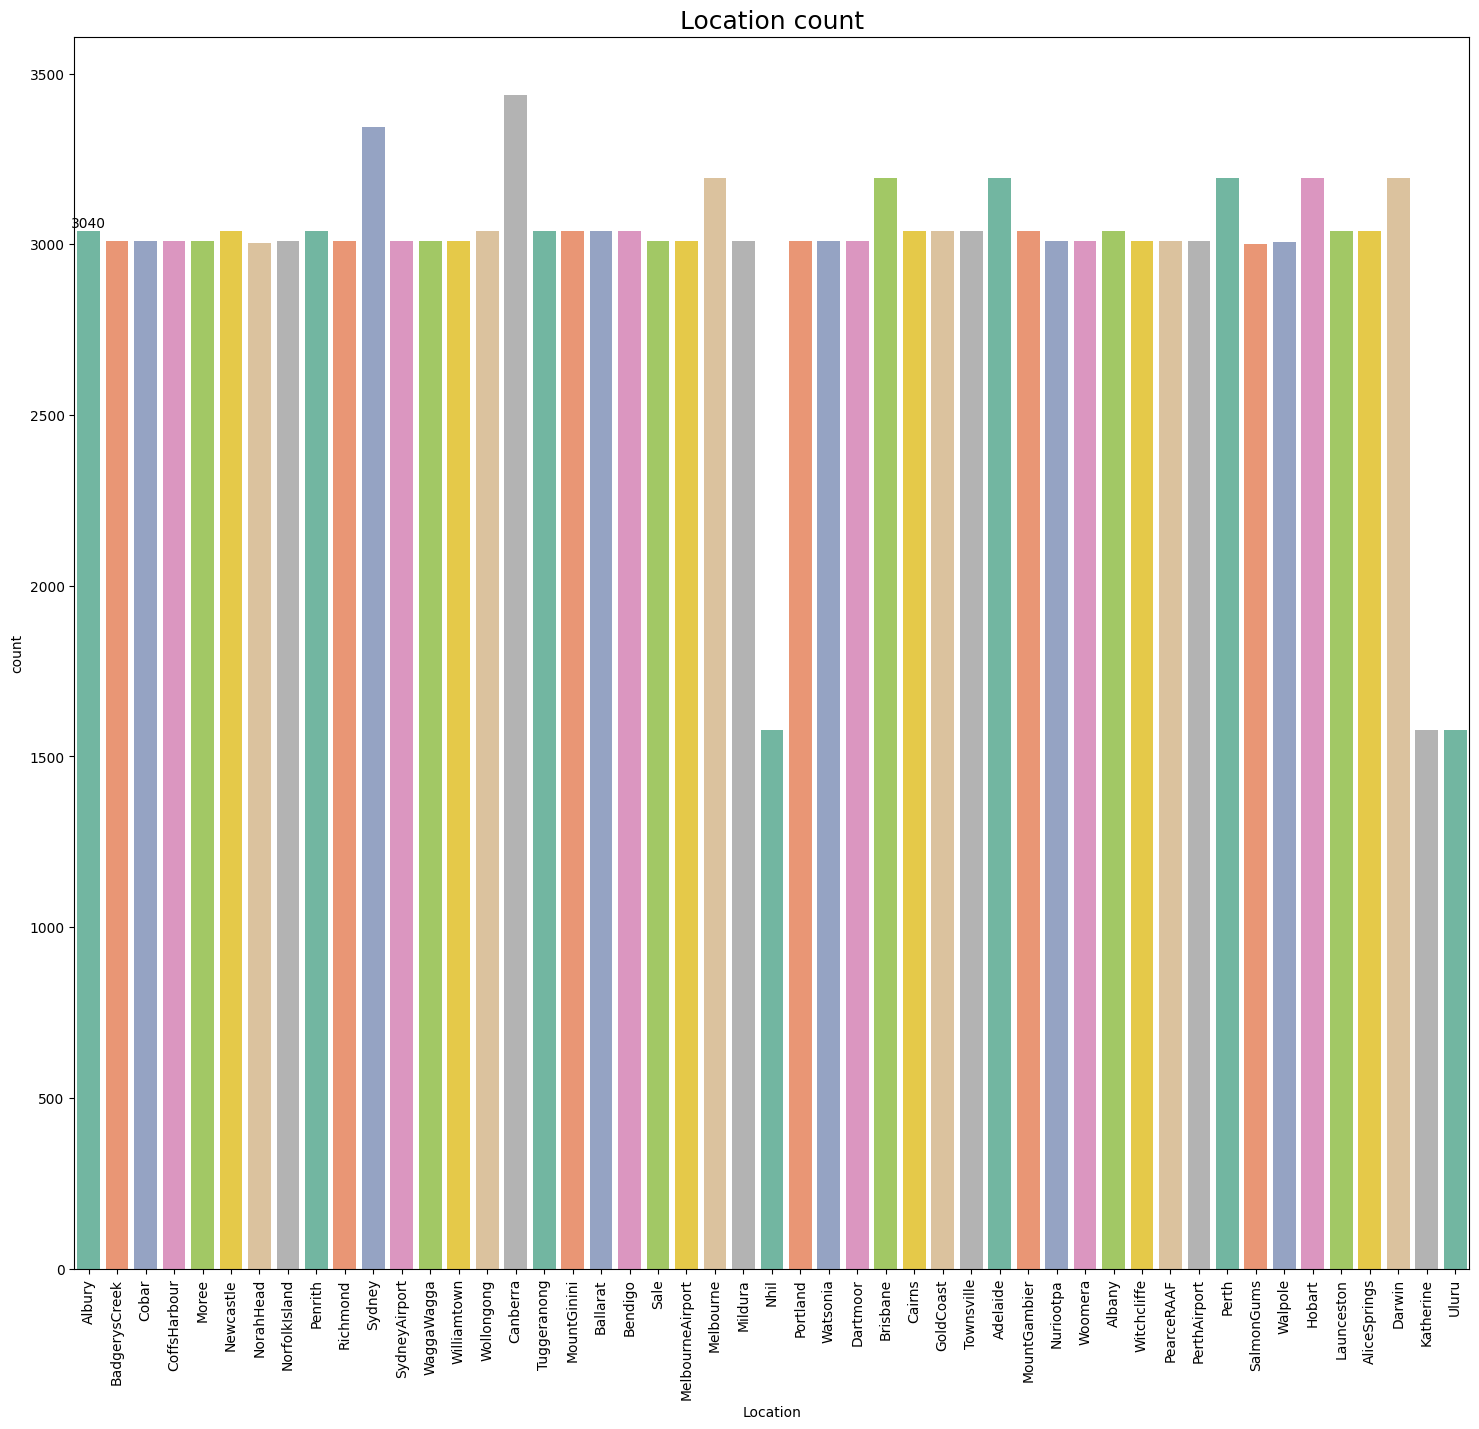

In [7]:
plt.figure(figsize=(18,16))
ax = sns.countplot(x ='Location',data=df, palette='Set2')
plt.xticks(rotation = 90)
ax.bar_label(ax.containers[0])
plt.title('Location count', fontsize=18)

plt.show()

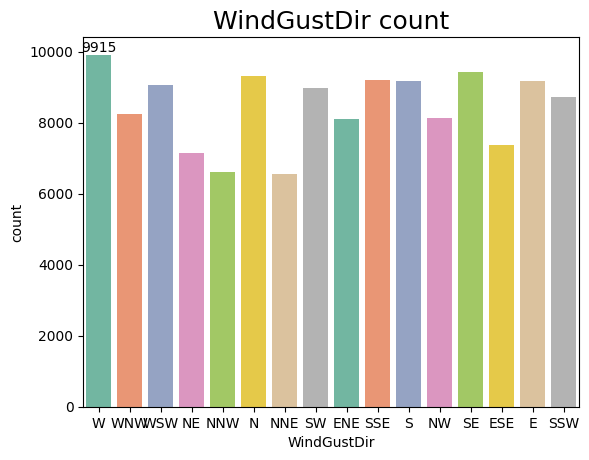

In [8]:
ax = sns.countplot(x ='WindGustDir',data=df,palette='Set2')
ax.bar_label(ax.containers[0]) 
plt.title('WindGustDir count', fontsize=18)
plt.show()

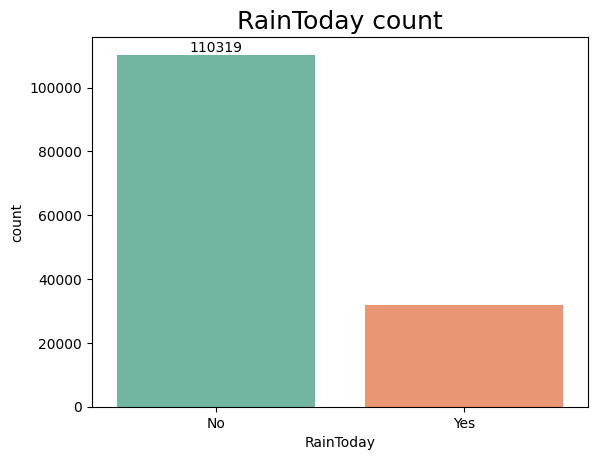

In [9]:
ax = sns.countplot(x ='RainToday',data=df,palette='Set2')
ax.bar_label(ax.containers[0]) 
plt.title('RainToday count', fontsize=18)
plt.show()

**Count of rain today and tomorrow**

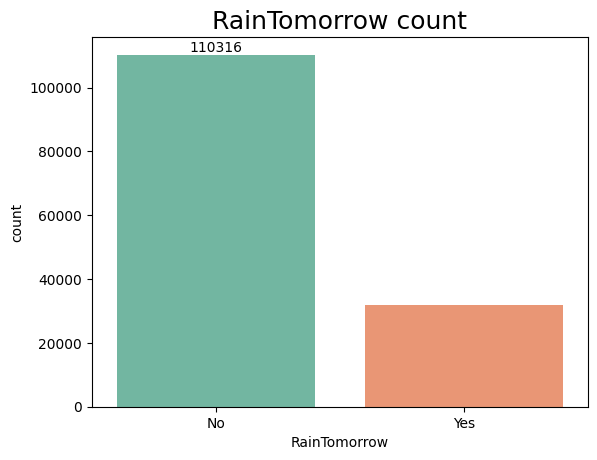

In [10]:
ax = sns.countplot(x ='RainTomorrow',data=df,palette='Set2')
ax.bar_label(ax.containers[0]) 
plt.title('RainTomorrow count', fontsize=18)
plt.show()

# **Checking Null values**

In [11]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

# **Visualizing the missing values**

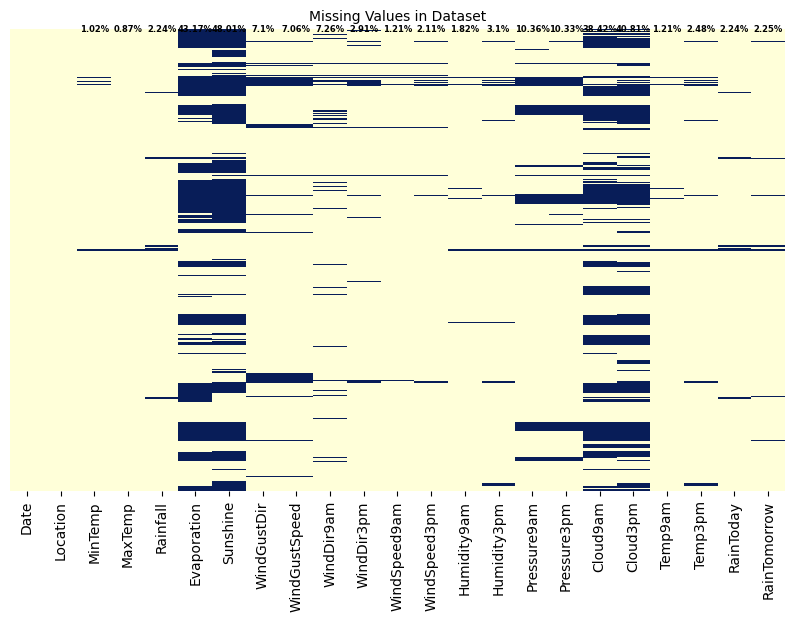

In [12]:
plot_missing_values(df)

# **Dealing with the missing values**

*Checking percentage of missing data in every column*

In [13]:
(df.isnull().sum()/len(df))*100

Date              0.000000
Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

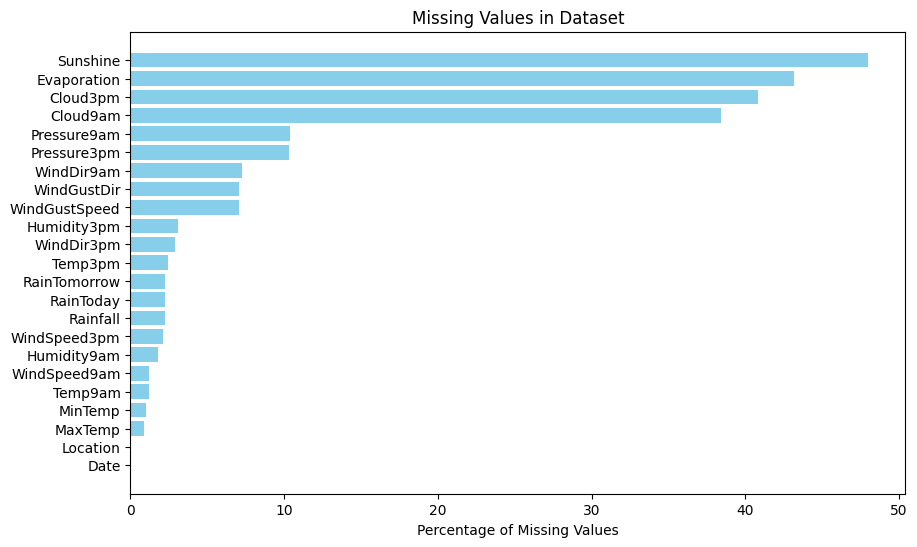

In [14]:
plot_missing_values_bar(df)

The above graphs show that the number of missing values are high in: Sunshine, Evaporation, Cloud3pm and Cloud9am.

*Drop "Evaporation" column*

In [15]:
df = df.drop(['Evaporation'], axis=1)
df = df.dropna(subset=['RainTomorrow'])

*Filling the missing values for continuous variables with mean*

In [16]:
df['MinTemp']=df['MinTemp'].fillna(df['MinTemp'].mean())
df['MaxTemp']=df['MinTemp'].fillna(df['MaxTemp'].mean())
df['Rainfall']=df['Rainfall'].fillna(df['Rainfall'].mean())
df['Sunshine']=df['Sunshine'].fillna(df['Sunshine'].mean())
df['WindGustSpeed']=df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean())
df['WindSpeed9am']=df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean())
df['WindSpeed3pm']=df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean())
df['Humidity9am']=df['Humidity9am'].fillna(df['Humidity9am'].mean())
df['Humidity3pm']=df['Humidity3pm'].fillna(df['Humidity3pm'].mean())
df['Pressure9am']=df['Pressure9am'].fillna(df['Pressure9am'].mean())
df['Pressure3pm']=df['Pressure3pm'].fillna(df['Pressure3pm'].mean())
df['Cloud9am']=df['Cloud9am'].fillna(df['Cloud9am'].mean())
df['Cloud3pm']=df['Cloud3pm'].fillna(df['Cloud3pm'].mean())
df['Temp9am']=df['Temp9am'].fillna(df['Temp9am'].mean())
df['Temp3pm']=df['Temp3pm'].fillna(df['Temp3pm'].mean())


*Filling the missing values for continuous variables with mode*

In [17]:
df['RainToday']=df['RainToday'].fillna(df['RainToday'].mode()[0])

*Filling the missing values for continuous variables with mode*

In [18]:
df['WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df['WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df['WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])

*Checking percentage of missing data in every column*

In [19]:
(df.isnull().sum()/len(df))*100

Date             0.0
Location         0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
RainTomorrow     0.0
dtype: float64

**All the missing values have been removed now.**

*Dropping date column*

In [20]:
df = df.iloc[:,1:]
df

,Location,MinTemp,MaxTemp,Rainfall,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,13.4,0.6,7.624853,W,44.0,W,WNW,20.0,...,71.0,22.0,1007.7,1007.1,8.000000,4.503167,16.9,21.8,No,No
1,Albury,7.4,7.4,0.0,7.624853,WNW,44.0,NNW,WSW,4.0,...,44.0,25.0,1010.6,1007.8,4.437189,4.503167,17.2,24.3,No,No
2,Albury,12.9,12.9,0.0,7.624853,WSW,46.0,W,WSW,19.0,...,38.0,30.0,1007.6,1008.7,4.437189,2.000000,21.0,23.2,No,No
3,Albury,9.2,9.2,0.0,7.624853,NE,24.0,SE,E,11.0,...,45.0,16.0,1017.6,1012.8,4.437189,4.503167,18.1,26.5,No,No
4,Albury,17.5,17.5,1.0,7.624853,W,41.0,ENE,NW,7.0,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,3.5,0.0,7.624853,E,31.0,ESE,E,15.0,...,59.0,27.0,1024.7,1021.2,4.437189,4.503167,9.4,20.9,No,No
145455,Uluru,2.8,2.8,0.0,7.624853,E,31.0,SE,ENE,13.0,...,51.0,24.0,1024.6,1020.3,4.437189,4.503167,10.1,22.4,No,No
145456,Uluru,3.6,3.6,0.0,7.624853,NNW,22.0,SE,N,13.0,...,56.0,21.0,1023.5,1019.1,4.437189,4.503167,10.9,24.5,No,No
145457,Uluru,5.4,5.4,0.0,7.624853,N,37.0,SE,WNW,9.0,...,53.0,24.0,1021.0,1016.8,4.437189,4.503167,12.5,26.1,No,No


# **Removing the outliers**

In [21]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

Q1 = numeric_df.quantile(0.25)
Q3 = numeric_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((numeric_df < (Q1 - 1.5 * IQR)) | (numeric_df > (Q3 + 1.5 * IQR))).sum()

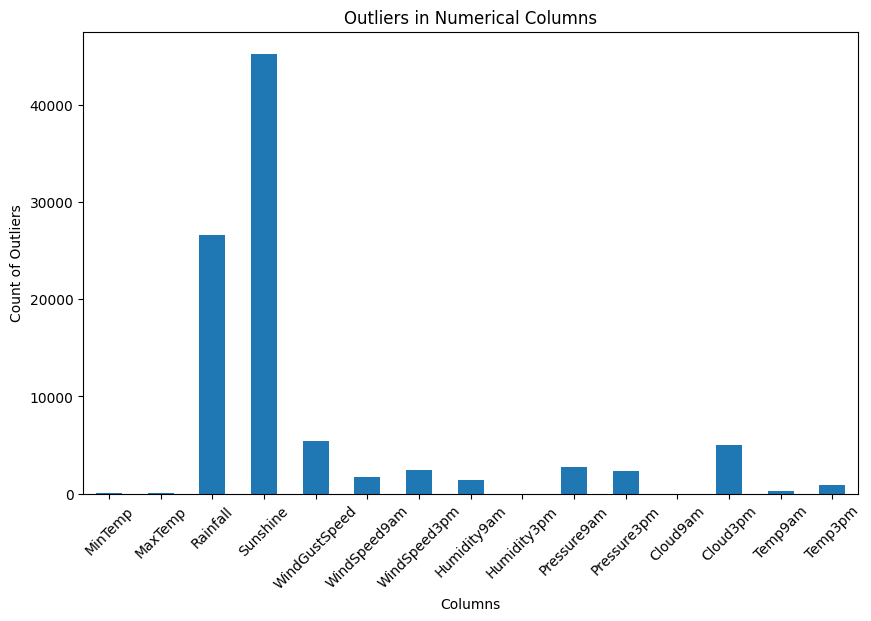

In [22]:
plt.figure(figsize=(10, 6))
outliers.plot(kind='bar')
plt.title('Outliers in Numerical Columns')
plt.xlabel('Columns')
plt.ylabel('Count of Outliers')
plt.xticks(rotation=45)
plt.show()

In [23]:
print('Shape of DataFrame before Removing Outliers', df.shape)
z_scores = (numeric_df - numeric_df.mean()) / numeric_df.std()

filtered_entries = (np.abs(z_scores) < 3).all(axis=1)
df = df[filtered_entries]

print('Shape of DataFrame After Removing Outliers', df.shape)

Shape of DataFrame before Removing Outliers (142193, 21)
Shape of DataFrame After Removing Outliers (135203, 21)


# Correlation Heatmap

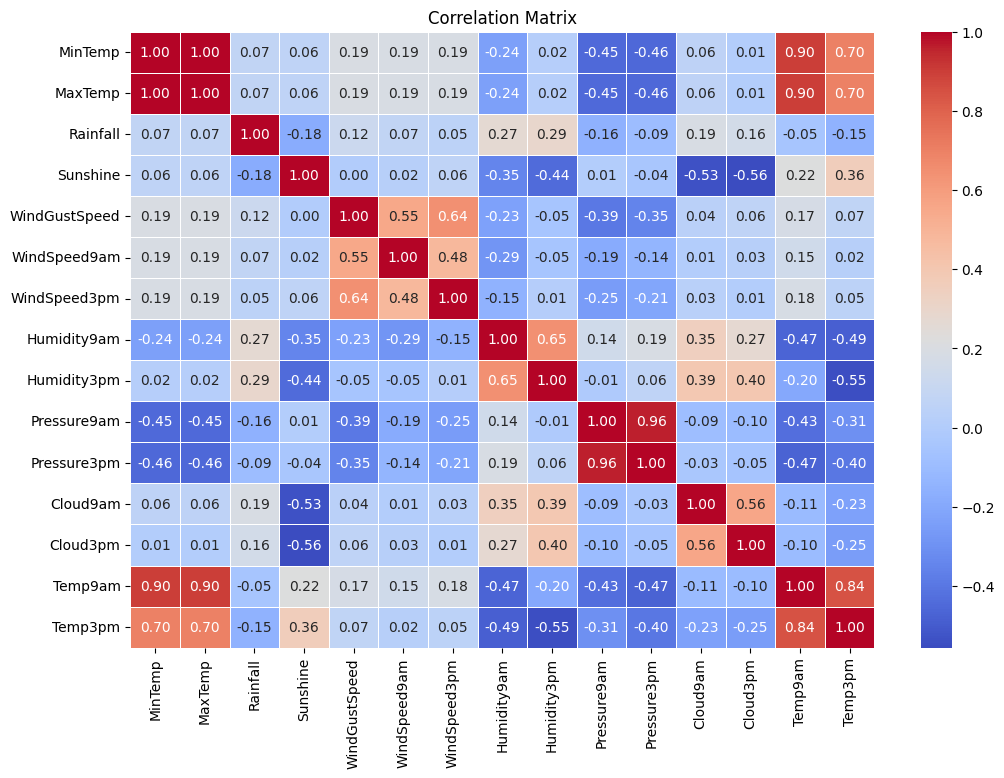

In [24]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

corr = numeric_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Encoding the categorical variables

**Changing yes and no to 1 and 0 in some columns**

In [25]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})

print(df.RainToday)
print(df.RainTomorrow)

0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainToday, Length: 135203, dtype: int64
0         0
1         0
2         0
3         0
4         0
         ..
145454    0
145455    0
145456    0
145457    0
145458    0
Name: RainTomorrow, Length: 135203, dtype: int64


In [31]:
encoder = CustomLabelEncoder()
encoder.fit(df['Location'])
df['Location'] = encoder.transform(df['Location'])
encoder.fit(df['WindDir9am'])
df['WindDir9am'] = encoder.transform(df['WindDir9am'])
encoder.fit(df['WindDir3pm'])
df['WindDir3pm'] = encoder.transform(df['WindDir3pm'])
encoder.fit(df['WindGustDir'])
df['WindGustDir'] = encoder.transform(df['WindGustDir'])